Fraction within ~200 of mean = 0.9571469999999963


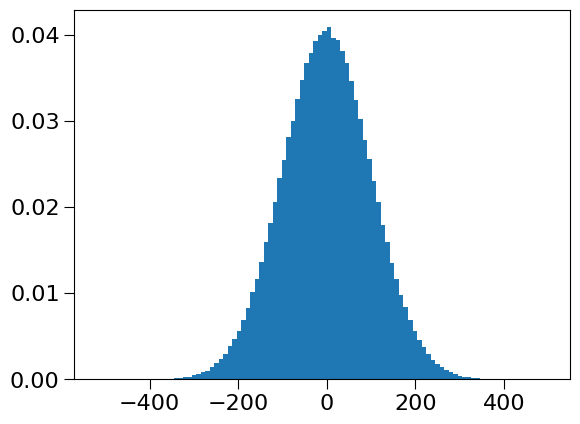

In [5]:
import random, numpy
import matplotlib.pylab as pylab

#from lecture6.monte_carlo import FairRoulette, playRoulette, findPocketReturn, getMeanAndStd


#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1


#quick generation of normally distributed data

random.seed(1)
dist, numsamples = [], 1000000

for i in range(numsamples):
    dist.append(random.gauss(0,100))

weights = [1/numsamples]*len(dist)
v = pylab.hist(dist, bins = 100, weights = [1/numsamples]*len(dist))

print('Fraction within ~200 of mean =', sum(v[0][30:70]))








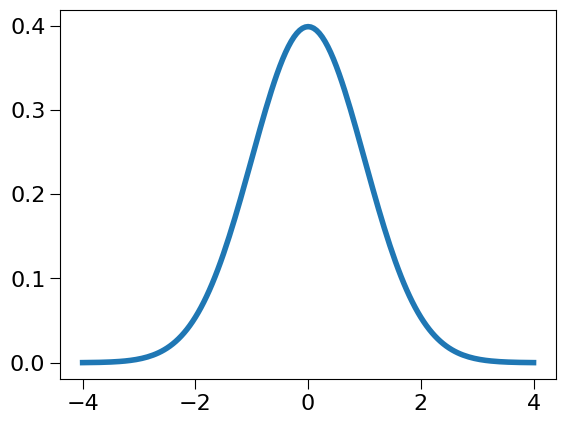

In [4]:
def guassian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*numpy.pi)**0.5)))
    factor2 = numpy.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

xVals, yVals = [], []
mu, sigma = 0, 1 
x=-4
while x <= 4:
    xVals.append(x)
    yVals.append(guassian(x, mu, sigma))
    x += 0.05
    

pylab.plot(xVals, yVals)

In [ ]:
## note in pdfs y values are densities which are derivatives of cumulitive frequency distributions 
#scipy is a numerical intergration library 

#from last lecture we know roulette wheel has uniform distributions so why did empirical rule hold? We wherent looking at a single spin but avg of a number of spins
#when referring to the mean of a number of trials use central limit theorem

#Central Limit Theorem: given a sufficiently large sample
#1.The means of the samples in a set of samples will be approximately normal. I.e distribution of sample means in normal
#2.this normal distribution will have a mean close to the population mean
#The variance of smaple means will be close to variance of the population divided by the sample size



Mean of rolling 1 die = 2.498762079015304, Std = 1.4432995860712594
Mean of rolling 50 dice = 2.499867418591217, Std = 0.20281831923576185


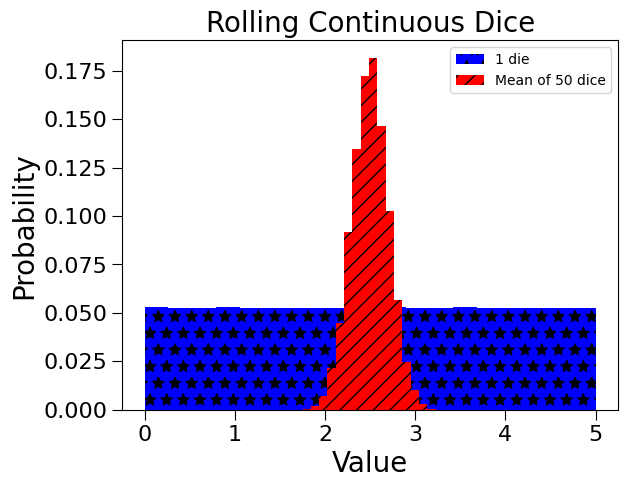

In [16]:
#checking empirical rule:
def getMeanAndStd(x):
    mean = sum(x)/float(len(x))
    tot = 0.0 
    for i in x:
        tot += (i-mean)**2
    std = (tot/len(x))**0.5
    return mean, std 

def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random()
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,weights = pylab.array(len(means)*[1])/len(means),hatch = style)
    return getMeanAndStd(means)


mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()




Text(0.5, 1.0, 'Expected Return Betting a Pocket 200 Times')

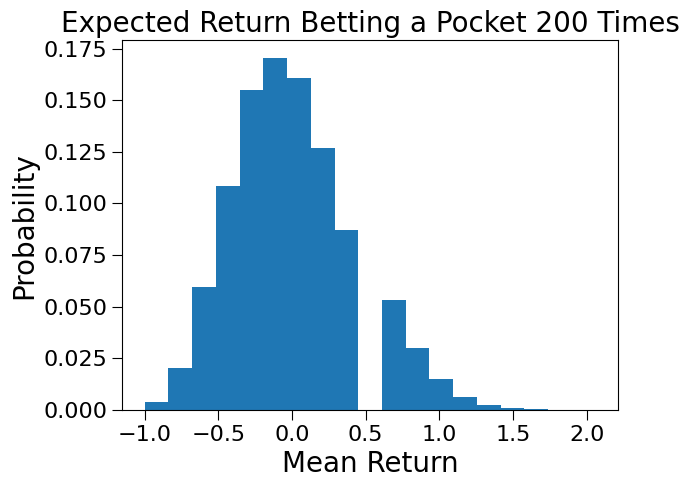

In [20]:
numTrials = 100000
numSpins = 200

class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1, 37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets)-1 
    
    def spin(self):
        self.ball = random.choice(self.pockets)

    def betPocket(self, pocket, amt):
        if str(pocket)==str(self.ball):
            return amt*self.pocketOdds
        else:
         return -amt
        
    def __str__(self):
        return 'Fair Roulette'
    
def findPocketReturn(game, numtrials, trialsize, toPrint):
    pocketReturns = []
    for t in range(numtrials):
        trialVals = playRoulette(game, trialsize, 2, 1, toPrint )
        pocketReturns.append(trialVals)
    return pocketReturns

def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spin of', game)
        print('Expected return betting', pocket, '=', str(100*totPocket/numSpins) +  '%\n')
    return(totPocket/numSpins)


game = FairRoulette()
means = []
for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins,False)[0])
pylab.hist(means, bins = 19,weights = [1/len(means)]*len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket 200 Times')

In [ ]:
#estimating pi

def throwNeedles(numNeedles):
    inCircle =0 
    for needles in range(1, numNeedles+1, 1):
        x = random.random()
        y = random.random()
        if (x*x+y*y)**0.5 <= 1:
            inCircle += 1
        return 4*(inCircle/float(numNeedles))

#Simulating Buffon-Laplace Method

